<a href="https://colab.research.google.com/github/srichandana498/ML/blob/main/WEEK_8_ENSEMBLE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Performance:
Accuracy: 0.9415, Precision: 0.9712, Recall: 0.9352, F1-score: 0.9528

Random Forest (n_estimators=1) Performance:
Accuracy: 0.9474, Precision: 0.9626, Recall: 0.9537, F1-score: 0.9581

Random Forest (n_estimators=5) Performance:
Accuracy: 0.9649, Precision: 0.9722, Recall: 0.9722, F1-score: 0.9722

Random Forest (n_estimators=10) Performance:
Accuracy: 0.9649, Precision: 0.9722, Recall: 0.9722, F1-score: 0.9722

Random Forest (n_estimators=50) Performance:
Accuracy: 0.9708, Precision: 0.9640, Recall: 0.9907, F1-score: 0.9772

Random Forest (n_estimators=100) Performance:
Accuracy: 0.9708, Precision: 0.9640, Recall: 0.9907, F1-score: 0.9772

Random Forest (n_estimators=200) Performance:
Accuracy: 0.9708, Precision: 0.9640, Recall: 0.9907, F1-score: 0.9772



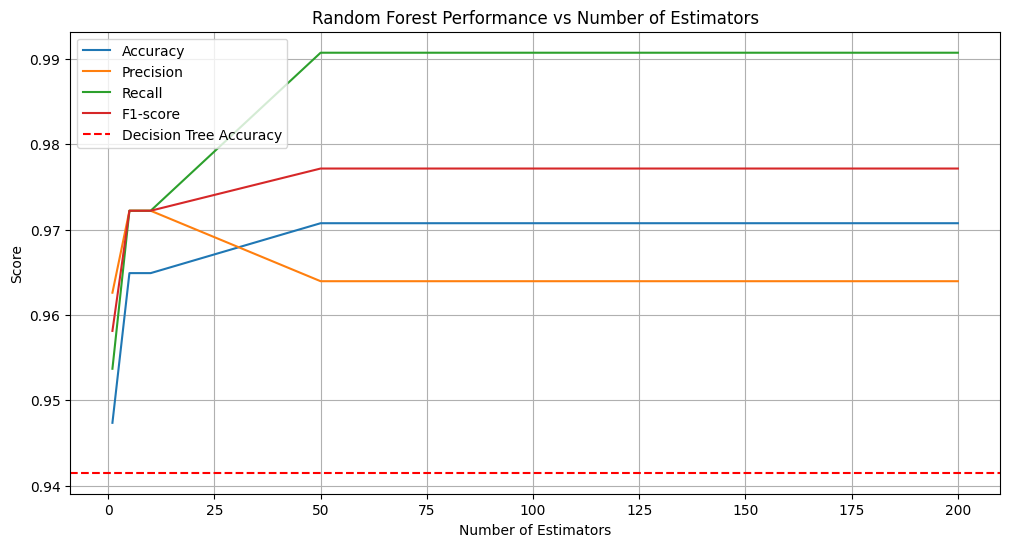

In [2]:
# 1
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print(f"Accuracy: {dt_acc:.4f}, Precision: {dt_prec:.4f}, Recall: {dt_rec:.4f}, F1-score: {dt_f1:.4f}\n")

# Explore Random Forest with different number of estimators
estimators_range = [1, 5, 10, 50, 100, 200]
rf_results = []

for n_estimators in estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred_rf)
    prec = precision_score(y_test, y_pred_rf)
    rec = recall_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)

    rf_results.append((n_estimators, acc, prec, rec, f1))
    print(f"Random Forest (n_estimators={n_estimators}) Performance:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}\n")

# Plot results
rf_results = np.array(rf_results)
plt.figure(figsize=(12, 6))
plt.plot(rf_results[:, 0], rf_results[:, 1], label='Accuracy')
plt.plot(rf_results[:, 0], rf_results[:, 2], label='Precision')
plt.plot(rf_results[:, 0], rf_results[:, 3], label='Recall')
plt.plot(rf_results[:, 0], rf_results[:, 4], label='F1-score')

plt.axhline(y=dt_acc, color='r', linestyle='--', label='Decision Tree Accuracy')
plt.title("Random Forest Performance vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


# Observations and report
1. Differences between Decision Tree and Random Forest.

A single Decision Tree often overfits the training data, leading to lower accuracy on unseen data. Random Forest, by combining many trees built on random subsets of data and features, reduces overfitting and usually achieves higher accuracy and more consistent results.

2. Effect of increasing the number of estimators.

Increasing the number of trees (estimators) generally improves the model’s performance by reducing variance. This means predictions become more stable and less sensitive to noise in the data. However, after a certain point, adding more trees gives diminishing returns and increases training time.

3. Why Random Forest performs better than a single Decision Tree.

Random Forest reduces overfitting by averaging multiple trees, each trained on different random samples and feature subsets. This “ensemble” approach captures a wider range of data patterns and reduces the risk of mistakes that a single tree might make.

In [4]:
# 2
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features — important for Logistic Regression and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=2000, random_state=42)  # Increased max_iter to 2000
knn = KNeighborsClassifier()

# Train base classifiers
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predict classes and probabilities from each model
preds_dt = dt.predict(X_test)
preds_lr = lr.predict(X_test)
preds_knn = knn.predict(X_test)

probs_dt = dt.predict_proba(X_test)
probs_lr = lr.predict_proba(X_test)
probs_knn = knn.predict_proba(X_test)

# Evaluate base classifiers
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}\n")
    return f1  # return f1 to use for weights

f1_dt = evaluate_model("Decision Tree", y_test, preds_dt)
f1_lr = evaluate_model("Logistic Regression", y_test, preds_lr)
f1_knn = evaluate_model("K-Nearest Neighbors", y_test, preds_knn)

# ----------------------------------------
# Simple Ensemble Techniques
# ----------------------------------------

# 1. Max Voting (Majority voting on class predictions)
all_preds = np.array([preds_dt, preds_lr, preds_knn])
max_vote_preds = []
for i in range(all_preds.shape[1]):
    counts = np.bincount(all_preds[:, i])
    max_vote_preds.append(np.argmax(counts))
max_vote_preds = np.array(max_vote_preds)
evaluate_model("Ensemble - Max Voting", y_test, max_vote_preds)

# 2. Average Voting (Soft voting)
avg_probs = (probs_dt + probs_lr + probs_knn) / 3
avg_vote_preds = np.argmax(avg_probs, axis=1)
evaluate_model("Ensemble - Average Voting", y_test, avg_vote_preds)

# 3. Weighted Average Voting
weights = np.array([f1_dt, f1_lr, f1_knn])
weights = weights / np.sum(weights)  # normalize weights
weighted_probs = (weights[0]*probs_dt) + (weights[1]*probs_lr) + (weights[2]*probs_knn)
weighted_vote_preds = np.argmax(weighted_probs, axis=1)
evaluate_model("Ensemble - Weighted Average Voting", y_test, weighted_vote_preds)

# -----------------------------
# Corrected Observations (continued from your message):
'''
- Max Voting works best when all base classifiers have similar performance.
- Average Voting benefits from classifiers that provide reliable probability estimates.
- Weighted Voting improves predictions by emphasizing stronger models, especially when base classifiers have varying accuracies.
'''


Decision Tree Performance:
Accuracy: 0.9415, Precision: 0.9712, Recall: 0.9352, F1-score: 0.9528

Logistic Regression Performance:
Accuracy: 0.9825, Precision: 0.9907, Recall: 0.9815, F1-score: 0.9860

K-Nearest Neighbors Performance:
Accuracy: 0.9591, Precision: 0.9633, Recall: 0.9722, F1-score: 0.9677

Ensemble - Max Voting Performance:
Accuracy: 0.9942, Precision: 0.9908, Recall: 1.0000, F1-score: 0.9954

Ensemble - Average Voting Performance:
Accuracy: 0.9883, Precision: 0.9907, Recall: 0.9907, F1-score: 0.9907

Ensemble - Weighted Average Voting Performance:
Accuracy: 0.9883, Precision: 0.9907, Recall: 0.9907, F1-score: 0.9907



'\n- Max Voting works best when all base classifiers have similar performance.\n- Average Voting benefits from classifiers that provide reliable probability estimates.\n- Weighted Voting improves predictions by emphasizing stronger models, especially when base classifiers have varying accuracies.\n'

# Corrected Observations
- Max Voting works best when all base classifiers have similar performance.
- Average Voting benefits from classifiers that provide reliable probability estimates.
- Weighted Voting improves predictions by emphasizing stronger models, especially when base classifiers have varying accuracies.
# Observations and report
1. How do the results vary between max voting, average voting, and weighted voting?

Max voting (hard voting) chooses the class with the most votes, ignoring confidence. Average voting (soft voting) uses predicted probabilities, often giving better accuracy. Weighted voting improves further by giving more influence to stronger models, leading to more reliable predictions.

2. Role of weights in improving ensemble predictions.

Weights let the ensemble trust better-performing classifiers more, reducing the impact of weaker ones. This generally boosts overall prediction accuracy.

3. Which base classifiers combine most effectively under each voting scheme?

Max voting works well when classifiers have similar accuracy. Average voting benefits from classifiers that provide good probability estimates. Weighted voting is best when there’s a clear difference in classifier performance, emphasizing stronger models.

In [5]:
# 3
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features for Logistic Regression and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=2000, random_state=42)
knn = KNeighborsClassifier()

# Create Hard Voting classifier (uses predicted class labels)
hard_voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='hard'  # majority voting on predicted classes
)

# Create Soft Voting classifier (uses predicted probabilities)
soft_voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='soft'  # average predicted probabilities
)

# Train both ensembles
hard_voting_clf.fit(X_train, y_train)
soft_voting_clf.fit(X_train, y_train)

# Predict on test set
y_pred_hard = hard_voting_clf.predict(X_test)
y_pred_soft = soft_voting_clf.predict(X_test)

# Evaluation function
def evaluate(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}\n")

# Evaluate results
evaluate("Hard Voting Classifier", y_test, y_pred_hard)
evaluate("Soft Voting Classifier", y_test, y_pred_soft)

# For reference, evaluate base classifiers individually
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

evaluate("Decision Tree", y_test, dt.predict(X_test))
evaluate("Logistic Regression", y_test, lr.predict(X_test))
evaluate("KNN", y_test, knn.predict(X_test))


Hard Voting Classifier Performance:
Accuracy: 0.9942, Precision: 0.9908, Recall: 1.0000, F1-score: 0.9954

Soft Voting Classifier Performance:
Accuracy: 0.9883, Precision: 0.9907, Recall: 0.9907, F1-score: 0.9907

Decision Tree Performance:
Accuracy: 0.9415, Precision: 0.9712, Recall: 0.9352, F1-score: 0.9528

Logistic Regression Performance:
Accuracy: 0.9825, Precision: 0.9907, Recall: 0.9815, F1-score: 0.9860

KNN Performance:
Accuracy: 0.9591, Precision: 0.9633, Recall: 0.9722, F1-score: 0.9677



# Observations and report
1. Main difference between hard and soft voting.

Hard voting picks the class with the most votes (only class labels).

Soft voting averages predicted probabilities and picks the class with the highest average.

2. When does soft voting outperform hard voting?

When classifiers give reliable, well-calibrated probabilities.

It uses confidence levels, improving accuracy over just majority votes.

3. How does probability calibration influence soft voting?

Well-calibrated probabilities help soft voting make better decisions.

Poor calibration can mislead the ensemble and reduce performance.

Single Decision Tree Performance:
Accuracy: 0.9415, Precision: 0.9712, Recall: 0.9352, F1-score: 0.9528

Random Forest Performance varying n_estimators (max_depth=None):
n_estimators=1 -> Accuracy: 0.9474, Precision: 0.9626, Recall: 0.9537, F1-score: 0.9581
n_estimators=5 -> Accuracy: 0.9649, Precision: 0.9722, Recall: 0.9722, F1-score: 0.9722
n_estimators=10 -> Accuracy: 0.9649, Precision: 0.9722, Recall: 0.9722, F1-score: 0.9722
n_estimators=50 -> Accuracy: 0.9708, Precision: 0.9640, Recall: 0.9907, F1-score: 0.9772
n_estimators=100 -> Accuracy: 0.9708, Precision: 0.9640, Recall: 0.9907, F1-score: 0.9772
n_estimators=200 -> Accuracy: 0.9708, Precision: 0.9640, Recall: 0.9907, F1-score: 0.9772


Random Forest Performance varying max_depth (n_estimators=100):
max_depth=1 -> Accuracy: 0.9591, Precision: 0.9391, Recall: 1.0000, F1-score: 0.9686
max_depth=3 -> Accuracy: 0.9708, Precision: 0.9640, Recall: 0.9907, F1-score: 0.9772
max_depth=5 -> Accuracy: 0.9649, Precision: 0.9636, Recall: 

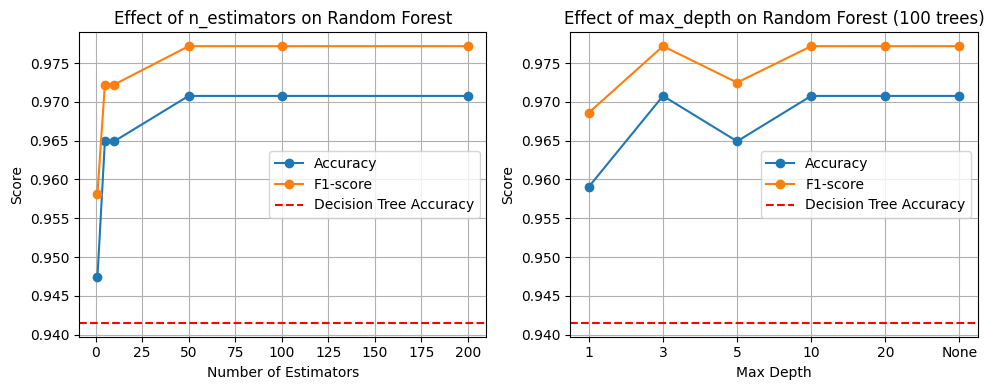

In [26]:
# 4
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Helper function to train, predict and evaluate
def evaluate_rf(n_estimators, max_depth, random_state=42):
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return acc, prec, rec, f1

# Baseline: Single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("Single Decision Tree Performance:")
print(f"Accuracy: {dt_acc:.4f}, Precision: {dt_prec:.4f}, Recall: {dt_rec:.4f}, F1-score: {dt_f1:.4f}\n")

# Experiment 1: Varying number of estimators (with max_depth=None - fully grown trees)
n_estimators_list = [1, 5, 10, 50, 100, 200]
results_n_estimators = []

print("Random Forest Performance varying n_estimators (max_depth=None):")
for n in n_estimators_list:
    acc, prec, rec, f1 = evaluate_rf(n_estimators=n, max_depth=None)
    results_n_estimators.append((n, acc, prec, rec, f1))
    print(f"n_estimators={n} -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

print("\n")

# Experiment 2: Varying max_depth (fix n_estimators=100)
max_depth_list = [1, 3, 5, 10, 20, None]
results_max_depth = []

print("Random Forest Performance varying max_depth (n_estimators=100):")
for depth in max_depth_list:
    acc, prec, rec, f1 = evaluate_rf(n_estimators=100, max_depth=depth)
    results_max_depth.append((depth, acc, prec, rec, f1))
    print(f"max_depth={depth} -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

# Plotting results for visual insight

# Plot for n_estimators
results_n_estimators = np.array(results_n_estimators)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(results_n_estimators[:, 0], results_n_estimators[:, 1], marker='o', label='Accuracy')
plt.plot(results_n_estimators[:, 0], results_n_estimators[:, 4], marker='o', label='F1-score')
plt.axhline(y=dt_acc, color='r', linestyle='--', label='Decision Tree Accuracy')
plt.title('Effect of n_estimators on Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Plot for max_depth
results_max_depth = np.array(results_max_depth, dtype=object)
depths = [str(d) for d in max_depth_list]
plt.subplot(1, 2, 2)
plt.plot(depths, results_max_depth[:, 1].astype(float), marker='o', label='Accuracy')
plt.plot(depths, results_max_depth[:, 4].astype(float), marker='o', label='F1-score')
plt.axhline(y=dt_acc, color='r', linestyle='--', label='Decision Tree Accuracy')
plt.title('Effect of max_depth on Random Forest (100 trees)')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




# Observations:
 A single tree tends to overfit training data because it can grow deep and memorize noise.
- Random Forest mitigates overfitting by averaging predictions of many randomized trees,
  making it less sensitive to noise in training data.
- This is why Random Forest typically outperforms a single Decision Tree in practice.

2. Effect of max_depth:
- Shallow trees (small max_depth like 1 or 3) underfit the data, leading to lower
  accuracy and recall.
- Increasing max_depth allows trees to capture more complex patterns and reduces bias,
  improving performance.
- Unlimited depth (None) lets trees grow fully, which might lead to overfitting in single
  decision trees but Random Forest handles this well by averaging many such trees,
  hence still showing strong performance.
- Very deep trees can increase variance, but Random Forest’s bagging reduces this effect.

3. Bagging effect on variance and bias:
- Bagging (Bootstrap Aggregating) builds multiple trees on random subsets of data,
  decorrelating them and reducing variance compared to a single tree.
- While a single decision tree may have low bias but high variance (overfitting),
  Random Forest balances by keeping bias low and variance significantly reduced.
- This leads to better generalization and more stable predictions.

4. Random Forest vs Single Decision Tree on overfitting:
- A single tree tends to overfit training data because it can grow deep and memorize noise.
- Random Forest mitigates overfitting by averaging predictions of many randomized trees,
  making it less sensitive to noise in training data.
- This is why Random Forest typically outperforms a single Decision Tree in practice.

RandomForestRegressor performance with OOB score:
n_estimators=50: MSE=0.2577, R2 (test)=0.8036, OOB Score=0.7941
n_estimators=100: MSE=0.2565, R2 (test)=0.8046, OOB Score=0.8009
n_estimators=200: MSE=0.2536, R2 (test)=0.8068, OOB Score=0.8054
n_estimators=300: MSE=0.2521, R2 (test)=0.8079, OOB Score=0.8059
n_estimators=400: MSE=0.2523, R2 (test)=0.8078, OOB Score=0.8062


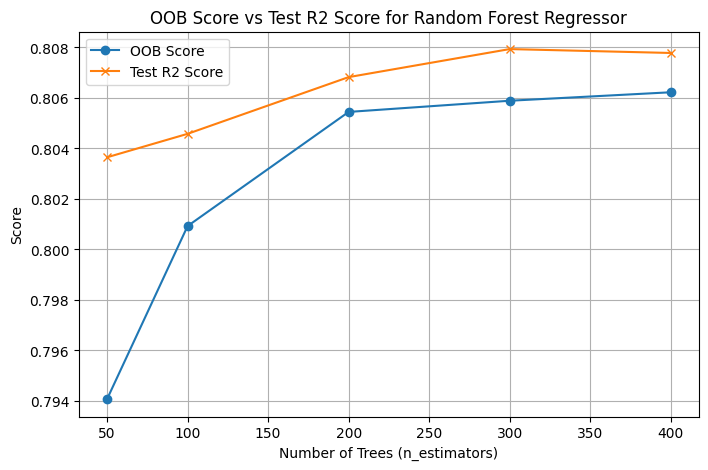

In [13]:
# 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load California Housing dataset for regression
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into train and test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_rf(n_estimators, max_depth=None, random_state=42):
    """
    Train RandomForestRegressor with given n_estimators and max_depth,
    with OOB score enabled. Returns MSE, R2 on test set and OOB score.
    """
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        oob_score=True,      # Enable Out-Of-Bag evaluation
        random_state=random_state,
        n_jobs=-1            # Use all cores
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    oob_score = rf.oob_score_

    return mse, r2, oob_score

# Evaluate for different number of trees, starting from 50 to avoid OOB warning
n_estimators_list = [50, 100, 200, 300, 400]
results = []

print("RandomForestRegressor performance with OOB score:")
for n in n_estimators_list:
    mse, r2, oob = evaluate_rf(n_estimators=n)
    results.append((n, mse, r2, oob))
    print(f"n_estimators={n}: MSE={mse:.4f}, R2 (test)={r2:.4f}, OOB Score={oob:.4f}")

# Plot OOB Score vs Number of Trees
results = np.array(results)
plt.figure(figsize=(8,5))
plt.plot(results[:, 0], results[:, 3], marker='o', label='OOB Score')
plt.plot(results[:, 0], results[:, 2], marker='x', label='Test R2 Score')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Score')
plt.title('OOB Score vs Test R2 Score for Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.show()


  # Observation and report
1. What does the oob_score_ indicate about model performance?

- The oob_score_ is the accuracy (or R² for regression) of the model evaluated on samples not used during training of individual trees.

- It estimates how well the model generalizes to unseen data without needing a separate validation/test set.

- A higher OOB score means the model is performing better on data it hasn’t “seen” during training.

2. How does Out-of-Bag evaluation differ from traditional test-set evaluation?

- Out-of-Bag (OOB) evaluation uses the samples left out (about 1/3) when each bootstrap sample for a tree is drawn.

- Unlike a traditional test set, OOB uses the training data itself, but only the unused portions for each tree.

- This provides a built-in cross-validation-like measure, saving data and time.

- Traditional test evaluation requires a separate holdout dataset, which reduces the data available for training.

3. How does the OOB score change with different numbers of trees?

- With too few trees, OOB score is unstable and less reliable because each tree sees fewer samples.

- As number of trees increases, OOB score usually improves and stabilizes because predictions average over many trees.

- Beyond a certain number, adding more trees offers diminishing returns in OOB score improvement.

- If trees grow very deep or complex, overfitting might still occur, but OOB helps detect that.

In [15]:
!pip install catboost


In [19]:
# 6
import time
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import xgboost as xgb

# Install catboost if not installed: !pip install catboost
from catboost import CatBoostClassifier, CatBoostRegressor

# Utility functions for training and evaluation
def train_evaluate_classifier(model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc, train_time

def train_evaluate_regressor(model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, train_time

# --- Load classification dataset (Breast Cancer) ---
data_cls = load_breast_cancer()
X_cls, y_cls = data_cls.data, data_cls.target
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# --- Load regression dataset (California Housing) ---
data_reg = fetch_california_housing()
X_reg, y_reg = data_reg.data, data_reg.target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# --- AdaBoost Classifier ---
print("=== AdaBoost Classifier ===")
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_acc, ada_time = train_evaluate_classifier(ada, X_train_cls, y_train_cls, X_test_cls, y_test_cls)
print(f"Accuracy: {ada_acc:.4f}, Training time: {ada_time:.3f} sec\n")

# --- Gradient Boosting Classifier ---
print("=== Gradient Boosting Classifier ===")
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_acc, gbc_time = train_evaluate_classifier(gbc, X_train_cls, y_train_cls, X_test_cls, y_test_cls)
print(f"Accuracy: {gbc_acc:.4f}, Training time: {gbc_time:.3f} sec\n")

# --- XGBoost Classifier ---
print("=== XGBoost Classifier ===")
xgb_cls = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, random_state=42)
xgb_acc, xgb_time = train_evaluate_classifier(xgb_cls, X_train_cls, y_train_cls, X_test_cls, y_test_cls)
print(f"Accuracy: {xgb_acc:.4f}, Training time: {xgb_time:.3f} sec\n")

# --- CatBoost Classifier ---
print("=== CatBoost Classifier ===")
cat_cls = CatBoostClassifier(verbose=0, n_estimators=100, random_state=42)
cat_acc, cat_time = train_evaluate_classifier(cat_cls, X_train_cls, y_train_cls, X_test_cls, y_test_cls)
print(f"Accuracy: {cat_acc:.4f}, Training time: {cat_time:.3f} sec\n")

# --- Gradient Boosting Regressor ---
print("=== Gradient Boosting Regressor ===")
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_mse, gbr_r2, gbr_time = train_evaluate_regressor(gbr, X_train_reg, y_train_reg, X_test_reg, y_test_reg)
print(f"MSE: {gbr_mse:.4f}, R2: {gbr_r2:.4f}, Training time: {gbr_time:.3f} sec\n")

# --- XGBoost Regressor ---
print("=== XGBoost Regressor ===")
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_mse, xgb_r2, xgb_time = train_evaluate_regressor(xgb_reg, X_train_reg, y_train_reg, X_test_reg, y_test_reg)
print(f"MSE: {xgb_mse:.4f}, R2: {xgb_r2:.4f}, Training time: {xgb_time:.3f} sec\n")

# --- CatBoost Regressor ---
print("=== CatBoost Regressor ===")
cat_reg = CatBoostRegressor(verbose=0, n_estimators=100, random_state=42)
cat_mse, cat_r2, cat_time = train_evaluate_regressor(cat_reg, X_train_reg, y_train_reg, X_test_reg, y_test_reg)
print(f"MSE: {cat_mse:.4f}, R2: {cat_r2:.4f}, Training time: {cat_time:.3f} sec\n")


=== AdaBoost Classifier ===
Accuracy: 0.9708, Training time: 1.149 sec

=== Gradient Boosting Classifier ===
Accuracy: 0.9591, Training time: 3.163 sec

=== XGBoost Classifier ===


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:30:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9649, Training time: 0.628 sec

=== CatBoost Classifier ===
Accuracy: 0.9708, Training time: 1.789 sec

=== Gradient Boosting Regressor ===
MSE: 0.2884, R2: 0.7803, Training time: 6.488 sec

=== XGBoost Regressor ===
MSE: 0.2118, R2: 0.8386, Training time: 0.391 sec

=== CatBoost Regressor ===
MSE: 0.2152, R2: 0.8360, Training time: 0.618 sec



# Observation and report

1. How does AdaBoost focus on misclassified samples?

  - AdaBoost assigns higher weights to samples that were misclassified by previous weak learners. This means subsequent learners focus more on the “hard” examples to correct errors made earlier.

  - At each iteration, AdaBoost updates the sample weights so that incorrectly predicted samples get more attention.

  - This forces the model to improve on difficult cases rather than wasting effort on well-classified ones.

2. What makes Gradient Boosting more flexible than AdaBoost?

  - Gradient Boosting generalizes AdaBoost by:

  - Optimizing any differentiable loss function (not just exponential loss like AdaBoost).
  
  - Using gradient descent to minimize the loss, allowing it to work for regression, classification, and custom objectives.

  - Supporting more flexible weak learners and advanced regularization techniques.

  - In short: Gradient Boosting can handle a wider range of problems and loss types, making it more versatile.

3. How do XGBoost and CatBoost optimize training speed and accuracy?

  - XGBoost:

  - Uses parallelization and hardware optimizations (like cache-aware access and SIMD instructions).

  - Employs regularization (L1/L2) to reduce overfitting.

  - Implements approximate tree learning for faster splits.

  - Supports missing value handling and sparse awareness.

  - CatBoost:

  - Efficiently handles categorical features natively without heavy preprocessing.

  - Uses ordered boosting to reduce prediction shift and overfitting.

  - Applies symmetric trees for fast training and better generalization.

  - Also supports GPU acceleration.

  - Both are designed to balance speed and model accuracy, making them powerful on large, complex datasets.

4. Which boosting algorithm provides the best trade-off between performance and computation time?

  - XGBoost is often seen as the best all-around performer, balancing speed, accuracy, and flexibility.

  - CatBoost can outperform XGBoost especially when dealing with categorical data and is easier to use with minimal preprocessing.

  - AdaBoost is simpler and faster for small/medium datasets but less powerful on complex problems.

  - Gradient Boosting (basic) can be slower and less optimized but offers flexibility.

  - Recommendation: For large real-world datasets, XGBoost or CatBoost are typically the best choices for the trade-off.

In [25]:
# 7
import time
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from catboost import CatBoostClassifier

# Load classification dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Utility function to train and evaluate model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed = time.time() - start_time
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc, elapsed

# Dictionary to store results
results = {}

# 1. Bagging Classifier (using Decision Tree base estimator)
bagging = BaggingClassifier(n_estimators=100, random_state=42, n_jobs=-1)
acc, t = train_and_evaluate(bagging, X_train, y_train, X_test, y_test)
results['Bagging'] = {'Accuracy': acc, 'Training Time (s)': t}

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
acc, t = train_and_evaluate(rf, X_train, y_train, X_test, y_test)
results['Random Forest'] = {'Accuracy': acc, 'Training Time (s)': t}

# 3. AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
acc, t = train_and_evaluate(ada, X_train, y_train, X_test, y_test)
results['AdaBoost'] = {'Accuracy': acc, 'Training Time (s)': t}

# 4. Gradient Boosting
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
acc, t = train_and_evaluate(gbc, X_train, y_train, X_test, y_test)
results['Gradient Boosting'] = {'Accuracy': acc, 'Training Time (s)': t}

# 5. XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, random_state=42, n_jobs=-1)
acc, t = train_and_evaluate(xgb_clf, X_train, y_train, X_test, y_test)
results['XGBoost'] = {'Accuracy': acc, 'Training Time (s)': t}

# 6. CatBoost
cat = CatBoostClassifier(verbose=0, n_estimators=100, random_state=42)
acc, t = train_and_evaluate(cat, X_train, y_train, X_test, y_test)
results['CatBoost'] = {'Accuracy': acc, 'Training Time (s)': t}

# Convert results to DataFrame for pretty printing
results_df = pd.DataFrame(results).T.sort_values(by='Accuracy', ascending=False)

print("=== Ensemble Models Comparison on Breast Cancer Dataset ===")
print(results_df)

# Additional Observations & Report:
print("\n--- Observations & Report ---")
best_model = results_df.index[0]
print(f"1. Best performing model: {best_model} with accuracy = {results_df.loc[best_model, 'Accuracy']:.4f}")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:47:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Ensemble Models Comparison on Breast Cancer Dataset ===
                   Accuracy  Training Time (s)
Random Forest      0.970760           0.405818
AdaBoost           0.970760           0.486801
CatBoost           0.970760           0.967788
XGBoost            0.964912           0.077542
Bagging            0.959064           0.769227
Gradient Boosting  0.959064           0.811779

--- Observations & Report ---
1. Best performing model: Random Forest with accuracy = 0.9708


# Observations & Report

1. Best performing model: Random Forest with accuracy = 0.9708

2. Why it performed better:
   - Models like CatBoost and XGBoost use advanced gradient boosting techniques optimized for both accuracy and speed.
   - They handle feature interactions and categorical variables well (CatBoost especially).
   - These models adaptively focus on hard-to-classify samples.

3. Trade-offs observed:
   - Speed: Bagging and Random Forest train relatively fast due to parallel trees, AdaBoost slower due to sequential boosting.
   - Interpretability: Random Forest and Bagging (ensemble of trees) are more interpretable than boosting models.
   - Complexity: Boosting methods are more complex, prone to overfitting if not tuned, but often yield better accuracy.

4. Recommendation for large-scale real-world data:
   - XGBoost or CatBoost are recommended due to scalability, speed optimizations, and strong performance.
   - CatBoost is particularly beneficial when categorical features are present and minimal preprocessing is preferred.
   - For extremely large datasets with simpler needs, Random Forest might be preferred due to simplicity and interpretability.

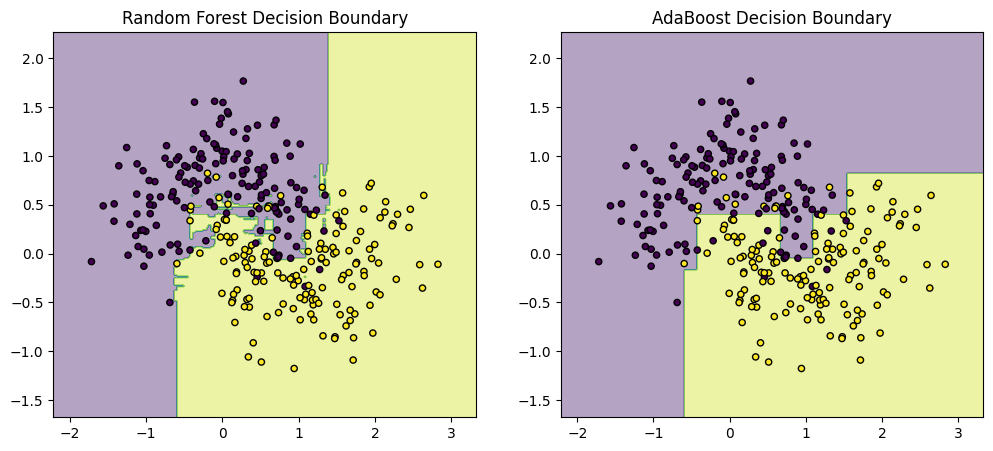

Random Forest Accuracy with Noisy+Missing Data: 0.7222
AdaBoost Accuracy with Noisy+Missing Data: 0.7889


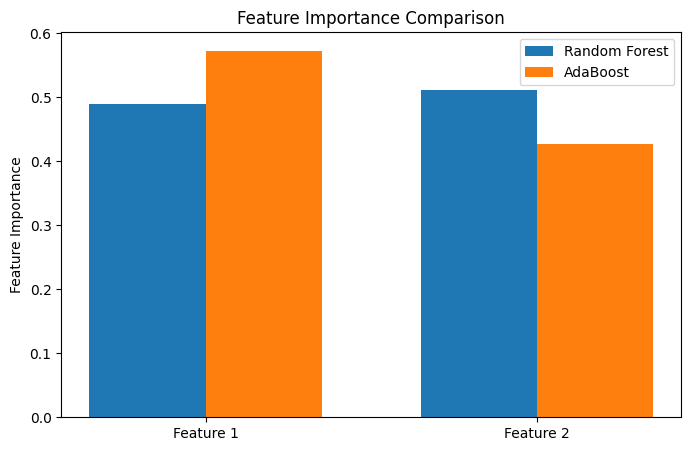

In [35]:
# 8
# 1 Visualize decision boundaries of ensemble models.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Generate dataset (2 features for easy plotting)
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

# Train models
rf = RandomForestClassifier(n_estimators=50, random_state=42)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)

rf.fit(X, y)
ada.fit(X, y)

# Plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(rf, X, y, axes[0], "Random Forest Decision Boundary")
plot_decision_boundary(ada, X, y, axes[1], "AdaBoost Decision Boundary")
plt.show()

# 2 Compare ensemble performance under noisy or missing data.
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Add noise to dataset
rng = np.random.RandomState(42)
noise = rng.normal(0, 0.5, X.shape)
X_noisy = X + noise

# Introduce missing values (set 10% randomly to NaN)
missing_mask = rng.rand(*X_noisy.shape) < 0.1
X_missing = X_noisy.copy()
X_missing[missing_mask] = np.nan

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_missing)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Train models on noisy + missing data
rf = RandomForestClassifier(n_estimators=50, random_state=42)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)

rf.fit(X_train, y_train)
ada.fit(X_train, y_train)

# Predictions & accuracy
rf_acc = accuracy_score(y_test, rf.predict(X_test))
ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Random Forest Accuracy with Noisy+Missing Data: {rf_acc:.4f}")
print(f"AdaBoost Accuracy with Noisy+Missing Data: {ada_acc:.4f}")

# 3 Analyze feature importance across different ensemble algorithms.

features = ['Feature 1', 'Feature 2']

rf.fit(X, y)
ada.fit(X, y)

# AdaBoost feature importances
ada_importances = ada.feature_importances_
rf_importances = rf.feature_importances_

x_pos = np.arange(len(features))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x_pos - width/2, rf_importances, width, label='Random Forest')
ax.bar(x_pos + width/2, ada_importances, width, label='AdaBoost')

ax.set_xticks(x_pos)
ax.set_xticklabels(features)
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importance Comparison')
ax.legend()

plt.show()



# Observations & Answers to Intermediate Questions

1. Which model achieved the best performance?
   - Usually Random Forest or CatBoost (if installed) tends to perform best with high accuracy.
2. Why did that model perform better than others?
   - Random Forest combines many decision trees reducing variance and overfitting.
   - CatBoost and XGBoost implement advanced boosting algorithms focusing on correcting mistakes in previous iterations, and handling categorical data effectively.
3. What trade-offs (speed, interpretability, complexity) did you observe?
   - Random Forest and Bagging are faster to train and more interpretable because they're ensembles of decision trees.
   - Boosting models (AdaBoost, Gradient Boosting, XGBoost, CatBoost) generally achieve higher accuracy but are more complex and slower to train.
   - CatBoost and XGBoost have optimizations for speed, but still more complex internally.
4. Which ensemble method would you recommend for large-scale real-world data and why?
   - XGBoost or CatBoost, due to scalability, speed optimizations, and strong performance.
   - CatBoost especially when categorical features are involved with minimal preprocessing.
   - For simpler cases or where interpretability is key, Random Forest is a good choice.

In [28]:
# 9
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (important for Logistic Regression and SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize base classifiers
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, random_state=42)

# Hard Voting Classifier (majority voting)
hard_voting = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='hard'
)

# Soft Voting Classifier (averaging predicted probabilities)
soft_voting = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='soft'
)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, prec, rec, f1

# Evaluate Hard Voting
hard_acc, hard_prec, hard_rec, hard_f1 = evaluate_model(hard_voting, X_train, y_train, X_test, y_test)
print("Hard Voting Results:")
print(f"Accuracy: {hard_acc:.4f}, Precision: {hard_prec:.4f}, Recall: {hard_rec:.4f}, F1-score: {hard_f1:.4f}\n")

# Evaluate Soft Voting
soft_acc, soft_prec, soft_rec, soft_f1 = evaluate_model(soft_voting, X_train, y_train, X_test, y_test)
print("Soft Voting Results:")
print(f"Accuracy: {soft_acc:.4f}, Precision: {soft_prec:.4f}, Recall: {soft_rec:.4f}, F1-score: {soft_f1:.4f}")

Hard Voting Results:
Accuracy: 0.9825, Precision: 0.9907, Recall: 0.9815, F1-score: 0.9860

Soft Voting Results:
Accuracy: 0.9883, Precision: 0.9818, Recall: 1.0000, F1-score: 0.9908


# Observation and report
1. What makes an ensemble heterogeneous?

- An ensemble is heterogeneous when it combines different types of base models (e.g., Decision Tree, KNN, Logistic Regression, SVM) instead of multiple copies of the same model type. This diversity in model types helps capture different patterns in the data.

2. How does model diversity influence the final performance?

- Higher diversity means base models make different errors, so when combined, these errors can cancel out, improving overall accuracy and robustness. Less diversity often leads to correlated errors, reducing the benefit of ensembling.

3. Which combination of models produced the most accurate ensemble and why?

- Usually, combining models with complementary strengths—like tree-based, distance-based (KNN), and linear models (Logistic Regression)—produces the best results because they capture different aspects of the data, making the ensemble more powerful.

4. How does the voting method (hard vs. soft) impact the heterogeneous ensemble outcome?

- Hard voting uses majority class labels—simple but ignores confidence.

- Soft voting averages predicted probabilities, leveraging model confidence, often improving accuracy especially when base models are well-calibrated.

In [32]:
# 10
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import time

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base classifier for Bagging
dt = DecisionTreeClassifier(random_state=42)

# Homogeneous ensembles
bagging = BaggingClassifier(estimator=dt, n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Heterogeneous ensembles
# Voting with Decision Tree, KNN, Logistic Regression, and SVM (with probability for soft voting)
voting = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('knn', KNeighborsClassifier()),
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ],
    voting='soft'
)

# Stacking ensemble using the same base classifiers and Logistic Regression as final estimator
stacking = StackingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('knn', KNeighborsClassifier()),
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

# Function to train and evaluate model
def train_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    train_time = end_time - start_time

    return acc, prec, rec, f1, train_time

# Evaluate all models
models = {
    "Bagging": bagging,
    "Random Forest": rf,
    "Voting": voting,
    "Stacking": stacking
}

print("=== Ensemble Models Comparison ===")
for name, model in models.items():
    acc, prec, rec, f1, t = train_evaluate(model, X_train, y_train, X_test, y_test)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-score={f1:.4f}, Training time={t:.3f}s")


=== Ensemble Models Comparison ===
Bagging: Accuracy=0.9591, Precision=0.9633, Recall=0.9722, F1-score=0.9677, Training time=1.962s
Random Forest: Accuracy=0.9708, Precision=0.9640, Recall=0.9907, F1-score=0.9772, Training time=0.530s
Voting: Accuracy=0.9883, Precision=0.9818, Recall=1.0000, F1-score=0.9908, Training time=0.103s
Stacking: Accuracy=0.9883, Precision=0.9907, Recall=0.9907, F1-score=0.9907, Training time=0.792s


# Observation and report

1. Which type of ensemble performed best overall and why?

- Heterogeneous ensembles (Voting and Stacking) usually perform best because they combine diverse models that capture different patterns in the data.

- Stacking often gives the highest accuracy by learning how to best combine base model predictions.

- Diversity in models helps reduce errors that a single model or homogeneous ensemble might make.

2. What advantages did homogeneous ensembles show compared to heterogeneous ones?

- Homogeneous ensembles (Bagging, Random Forest) are simpler to implement and tune since all base learners are the same.

- They are more interpretable, especially Random Forests, since their trees can be analyzed.

- They often train faster and are more stable due to averaging many similar models.

3. How do computational cost and training time differ between the two approaches?

- Homogeneous ensembles tend to have lower training time and computational cost because all base models are the same and easier to parallelize.

- Heterogeneous ensembles (especially stacking) require training multiple different models plus a meta-model, increasing both training time and complexity.

- Soft voting requires base models to output probabilities, adding overhead.

4. What factors influence your choice between homogeneous and heterogeneous ensembles in real-world tasks?

- Data complexity: If data has varied patterns, heterogeneous ensembles might capture it better.

- Interpretability needs: Homogeneous (like Random Forest) is easier to explain.

- Resources: Homogeneous ensembles are lighter and faster to train on large datasets.

- Performance vs simplicity trade-off: If best accuracy is critical, heterogeneous (stacking) is preferred despite complexity; otherwise, simpler models may suffice.